https://github.com/mica5/statistics/blob/master/statistics.ipynb

# Introduction

Any data here, unless otherwise stated, is from the book Probability and Statistics for Engineering and the Sciences, 9th Edition, by Jay Devore (CENGAGE Learning). https://www.amazon.com/Probability-Statistics-Engineering-Sciences-Devore/dp/1305251806 ; many of concepts here are from there and also from taking MATH161A at SJSU (San Jose State University in San Jose, California) in Spring 2018.

This notebook is easier to view using the "Table of Contents (2)" Nbextension (within Jupyter Notebook -> menu bar -> edit -> nbextensions config -> Table of Contents (2) -> enable. Then from inside the Jupyter Notebook -> menu bar -> "Table of Contents" button).

In [1]:
# these are standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# additional imports
from sklearn import datasets
from IPython.display import HTML
from collections import Counter
from IPython.display import Latex


# Stratified Sampling

In [2]:
from sklearn.model_selection import train_test_split

i = 100

# generate lists. it will look like [0, 0, ..., 0, 1, 1, ..., 1], where there are twice as many 1s as there are 0s
population = [0]*i + [1]*i*2
# the category is used to first split all the data by categories, then random sampling will be taken from within each category. but the way stratified sampling is meant to happen is that the number of items selected in each category compared to the number of items selected from the other categories is roughly proportional to the number of items in that category compared to the number of items in the population. that way, each category should get a representational sample, instead of categories with more items compared to the number in other catgories getting underrepresented compared to categories that have very few items.
category = [0]*i + [1]*i*2
# we should have twice as many 1s as we have 0s

# take the stratified sample. by default, based on sklearn version 0.19.1, the sample will be 75% of the population (by default, test is 25%, and train is the complement of test, so train will be 75%)
sample, _ = train_test_split(population, stratify=category)

# count the number of 0s and ones
c0 = sample.count(0)
c1 = sample.count(1)
total = c0 + c1
# here are the proportions.
print('proportion of 0s:', c0 / total)
print('proportion of 1s:', c1 / total)
print('all added together to make sure it adds to 1:', (c0+c1)/total)
print('number of 1s compared to 0s, which should be 2:', c1/c0)

proportion of 0s: 0.3333333333333333
proportion of 1s: 0.6666666666666666
all added together to make sure it adds to 1: 1.0
number of 1s compared to 0s, which should be 2: 2.0


# Notation

An example sample: {6.3, 6.2, 5.9, 6.5}, and an example population that sample was drawn from: {6.3, 4.8, 6.2, 7.6, 5.9, 6.4, 6.5, 5.9}<br>
n=4, where n is the number of observations in the sample.<br>
When considering more than one sample, we can use $n$ and $m$ or $n_1$ and $n_2$.

Letters like x, y, and z are used to denote variables, e.g. length/height/width/age/...<br>
When considering the variable for multiple samples, we can use $x_1, x_2, x_3, \dots, x_n$. The subscribt number is the observation number, like the id in a database, which typically has no relationship to the values themselves.

In [6]:
headers = ['Construct', 'Population', 'Sample']
data = [
    ['count', 'N', 'n'],
    ['mean', '$\mu$', r'$\bar{x}$'],
    ['median', r'$\tilde{\mu}$', r'$\tilde{x}$'],
    ['proportion', '$p$', r'$\frac{x}{n}$'],
]
# make the font bigger so it's easier to see tildes/bars/etc
# from https://pandas.pydata.org/pandas-docs/stable/style.html
styles = [{'selector': 'td', 'props': [('font-size', '18px')]}]
pd.DataFrame(data, columns=headers).set_index('Construct').style.set_table_styles(styles)

,Population,Sample
Construct,,
count,N,n
mean,$\mu$,$\bar{x}$
median,$\tilde{\mu}$,$\tilde{x}$
proportion,$p$,$\frac{x}{n}$


# Vocabulary

Point estimate: a single number that is a best guess (e.g. mean).<br>

# Load a dataset

In [21]:
%%time
iris = datasets.load_iris()

CPU times: user 2.4 ms, sys: 2.77 ms, total: 5.17 ms
Wall time: 3.12 ms


In [22]:
type(iris)

sklearn.utils.Bunch

In [23]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [24]:
print('plant observations:', len(iris['feature_names']), iris['feature_names'])
print('species:', len(iris['target_names']), iris['target_names'])


plant observations: 4 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
species: 3 ['setosa' 'versicolor' 'virginica']


# Categories

In [25]:
letter_grades = [c for c in 'ABCDF']
grades = pd.Categorical(letter_grades, ordered=True, categories=letter_grades[::-1])
grades

[A, B, C, D, F]
Categories (5, object): [F < D < C < B < A]

In [26]:
student_standing = 'freshmen, sophomores, juniors, seniors, graduate students'.split(', ')
student_standing_categories = pd.Categorical(student_standing, ordered=True, categories=student_standing)
student_standing_categories

[freshmen, sophomores, juniors, seniors, graduate students]
Categories (5, object): [freshmen < sophomores < juniors < seniors < graduate students]

In [27]:
targets = pd.Series([iris['target_names'][i] for i in iris['target']])
print("individual frequencies:")
display(targets.value_counts())
print("relative frequencies:")
targets.value_counts() / len(targets)

individual frequencies:


setosa        50
versicolor    50
virginica     50
dtype: int64

relative frequencies:


setosa        0.333333
versicolor    0.333333
virginica     0.333333
dtype: float64

Note that the relative frequencies are equivalent to the "sample proportion of observations in those categories". (Devore, 34)

# Measures of location (e.g. mean and median)

In [28]:
sepal_length = iris['data'][:, iris['feature_names'].index('sepal length (cm)')]
sepal_length.shape

(150,)

In [29]:
sepal_length.min(), sepal_length.max()

(4.2999999999999998, 7.9000000000000004)

In [30]:
sepal_length_mean = sepal_length.mean()
sepal_length_mean

5.8433333333333337

In [31]:
sepal_length_median = np.median(sepal_length)
sepal_length_median

5.7999999999999998

In [32]:
def quartile(iterable, count=4):
    quartile_nums = np.linspace(0, 1, count+1)[1:-1]
    if not isinstance(iterable, pd.Series):
        iterable = pd.Series(iterable)
    return iterable.quantile(quartile_nums)

In [33]:
qs = quartile(sepal_length, count=4)
qs

0.25    5.1
0.50    5.8
0.75    6.4
dtype: float64

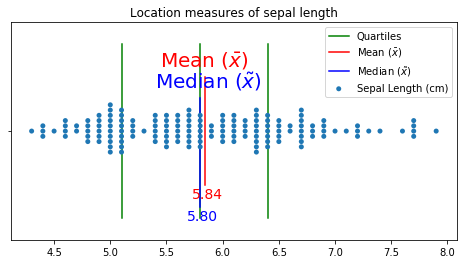

In [34]:
plt.figure(figsize=(8, 4))
sns.swarmplot(sepal_length, label='Sepal Length (cm)')

qcolor = 'g'
i = 0
for q in qs:
    label = 'Quartiles' if i == 0 else None
    i += 1
    plt.plot([q, q], [-0.4, 0.4], qcolor, label=label)

# mean
# draw a vertical line at the mean
meancolor = 'r'
mean_label = 'Mean ($\\bar{x}$)'
plt.plot([sepal_length_mean, sepal_length_mean], [-0.25, 0.25], meancolor, label=mean_label)
plt.text(sepal_length_mean-.4, -0.3, mean_label, color=meancolor, fontsize=20)
plt.text(sepal_length_mean-.12, 0.31, '{:.2f}'.format(sepal_length_mean), color=meancolor, fontsize=14)

# median
y_adder = 0.1
# draw a vertical line at the median
median_label = 'Median ($\\tilde{x}$)'
plt.plot([sepal_length_median, sepal_length_median], [-0.25+y_adder, 0.25+y_adder], 'b', label=median_label)
plt.text(sepal_length_median-.4, -0.3+y_adder, median_label, color='b', fontsize=20)
plt.text(sepal_length_median-.12, 0.31+y_adder, '{:.2f}'.format(sepal_length_median), color='b', fontsize=14)

plt.title("Location measures of sepal length")
plt.legend()
plt.show()

Quartiles divide the dataset into four equal parts. The following is a better example of quartiles.

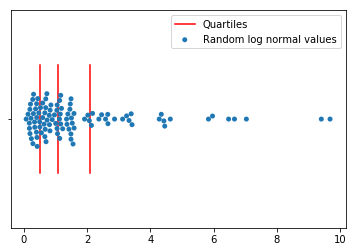

In [35]:
np.random.seed(0)
data = np.random.lognormal(size=100)
sns.swarmplot(data, label='Random log normal values')

qs = quartile(data, count=4)

label = 'Quartiles'
for q in qs:
    plt.plot([q, q], [-.25, .25], color='r', label=label)
    label = None

plt.legend()
plt.show()

In the graph above, it's more clear that a quartile is based on the number of values in each section.

## Trimmed mean

Trim off some percentage of the lowest and highest values, and take the average of the remainder.

In [36]:
def get_trimmed_mean(iterable, percent=10):
    proportion = percent / 100
    trimmed_count = int(len(iterable) * proportion)
    iterable = iterable[trimmed_count:-trimmed_count]
    if not isinstance(iterable, np.ndarray):
        iterable = np.array(iterable)
    return iterable.mean()

sepal_length_trimmed_mean = get_trimmed_mean(sepal_length)
sepal_length.mean(), sepal_length_trimmed_mean

(5.8433333333333337, 5.8750000000000009)

In [37]:
# Bidri data from Devore, 33
bidri_data = np.array([2.0, 2.4, 2.5, 2.6, 2.6, 2.7, 2.7, 2.8, 3.0, 3.1, 3.2, 3.3, 3.3, 3.4, 3.4, 3.6, 3.6, 3.6, 3.6, 3.7, 4.4, 4.6, 4.7, 4.8, 5.3, 10.1])
print('number of records:', len(bidri_data))
print('mean             : {:.2f}'.format(bidri_data.mean()))
print('median           : {:.2f}'.format(np.median(bidri_data)))
display(Latex('trimmed mean of 2/26 ($\\bar{x}_{tr(10)}$): %.2f' % get_trimmed_mean(bidri_data, percent=2/26*100)))

number of records: 26
mean             : 3.65
median           : 3.35


<IPython.core.display.Latex object>

The values above match those in the book:<br>
mean: 3.65<br>
median: 3.35<br>
trimmed mean: 3.42